In [1]:
import pandas as pd
import numpy as np
from analysis_utils import *


In [2]:
PAREDAO = "paredao10"
CAND1_PATH = "data/paredao10/manu.csv"
CAND2_PATH = "data/paredao10/mari.csv"
CAND3_PATH = "data/paredao10/prior.csv"
DATE = 3


In [3]:
candidate1_df = pd.read_csv(CAND1_PATH)
candidate2_df = pd.read_csv(CAND2_PATH)
candidate3_df = pd.read_csv(CAND3_PATH)

In [4]:
cand1 = candidate1_df[["tweet", "sentiment", "date", "likes_count", "retweets_count"]]
cand2 = candidate2_df[["tweet", "sentiment", "date", "likes_count", "retweets_count"]]
cand3 = candidate3_df[["tweet", "sentiment", "date", "likes_count", "retweets_count"]]

# Manu

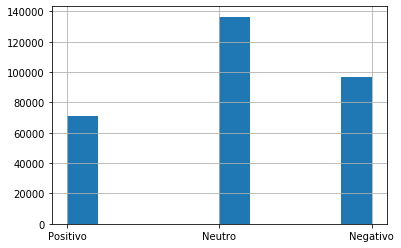

In [5]:
cand1["sentiment"].hist()

In [6]:
cand1

,tweet,sentiment,date,likes_count,retweets_count
0,Foco no #ForaManurascista \nMulherzinha fútil ...,Positivo,2020-03-31,0,0
1,#ForaManu,Neutro,2020-03-31,0,0
2,que??,Neutro,2020-03-31,0,0
3,ISSO BORA VOTAR #FORAPRIOR,Negativo,2020-03-31,0,0
4,Já estou no meu próprio mutirão. Dando votos a...,Negativo,2020-03-31,0,0
...,...,...,...,...,...
304551,Muito linda,Positivo,2020-03-29,1,0
304552,se a manu não for pro paredão hoje de qualquer...,Negativo,2020-03-29,7,3
304553,Mari x Manu x PRIOR ELIMINADO #bbb20 https://...,Neutro,2020-03-29,0,1
304554,Manu planejando estragar o dia do Boninho #BBB...,Neutro,2020-03-29,5,2


# Mari

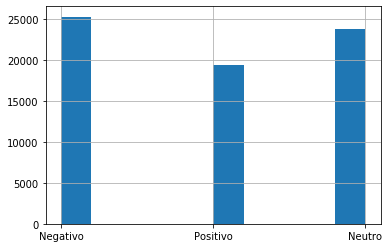

In [7]:
cand2["sentiment"].hist()

In [8]:
cand2

,tweet,sentiment,date,likes_count,retweets_count
0,#ForaManu #TeamPrior #tropadopior,Negativo,2020-03-31,0,0
1,"Nessa Briga #ForaManu e #ForaPrior, quem se de...",Positivo,2020-03-31,3,0
2,"Adm nao fode, #ForaManu porra!!!",Negativo,2020-03-31,0,0
3,Estamos com vc time boca 🌹,Positivo,2020-03-31,0,0
4,Eita @boninho Flay e Prior dizem que médico da...,Negativo,2020-03-31,0,0
...,...,...,...,...,...
68458,a mari ela kkkk #bbb20 pic.twitter.com/Dz6zes...,Positivo,2020-03-29,0,0
68459,A mari n saí #BBB20,Negativo,2020-03-29,0,0
68460,A Mari é muito poia kkkkkkkkkkkkj #BBB20,Positivo,2020-03-29,0,0
68461,Mari KKKKKKKKKKKK #bbb20,Neutro,2020-03-29,0,0


# Prior

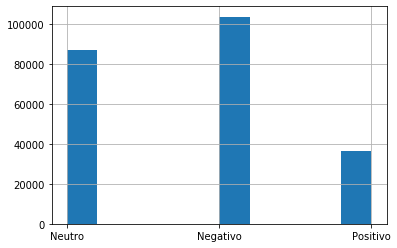

In [9]:
cand3["sentiment"].hist()

In [10]:
cand3

,tweet,sentiment,date,likes_count,retweets_count
0,200,Neutro,2020-03-31,0,0
1,2500 to votando desde 17h,Neutro,2020-03-31,0,0
2,#Manurascista,Neutro,2020-03-31,0,0
3,peguei só +464 \n\ntravando muito,Negativo,2020-03-31,0,0
4,1450 das 19h e de agora,Neutro,2020-03-31,1,0
...,...,...,...,...,...
227760,FORA PRIOR SIM #BBB20,Neutro,2020-03-29,0,0
227761,Adeus Prior. #bbb20,Neutro,2020-03-29,4,1
227762,por um lado é bom pq o foco vai ser todo no pr...,Neutro,2020-03-29,3,0
227763,fodase fora prior #bbb20,Positivo,2020-03-29,2,0


# Quantidades absolutas

In [11]:
candidates = {"manu_gavassi": cand1, "mari": cand2, "felipe_prior": cand3}

In [12]:
qtds_df = get_raw_quantities(candidates)

In [13]:
qtds_df

,positivos,neutros,negativos
nome,,,
manu_gavassi,71199,136446,96911
mari,19342,23829,25292
felipe_prior,36649,87341,103775


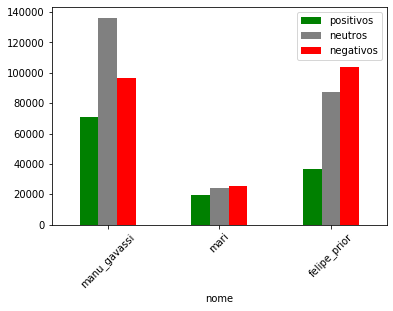

In [14]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação aos total de tweets de cada candidato

In [15]:
pcts_df = get_pct_by_candidate(candidates)

In [16]:
pcts_df

,positivos,neutros,negativos
nome,,,
manu_gavassi,0.233780,0.448016,0.318204
mari,0.282518,0.348057,0.369426
felipe_prior,0.160907,0.383470,0.455623


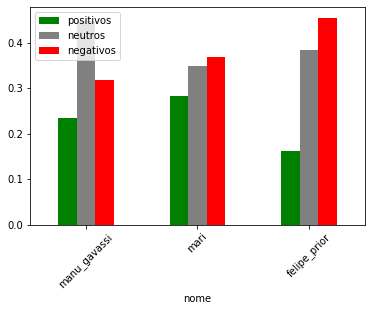

In [17]:
pcts_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação ao total de tweets por categoria

In [18]:
qtds_df_copy = qtds_df.copy()

In [19]:
qtds_df["positivos"] /= qtds_df["positivos"].sum() 
qtds_df["neutros"] /= qtds_df["neutros"].sum()
qtds_df["negativos"] /= qtds_df["negativos"].sum()

In [20]:
qtds_df

,positivos,neutros,negativos
nome,,,
manu_gavassi,0.559785,0.551039,0.428851
mari,0.152072,0.096234,0.111922
felipe_prior,0.288144,0.352728,0.459226


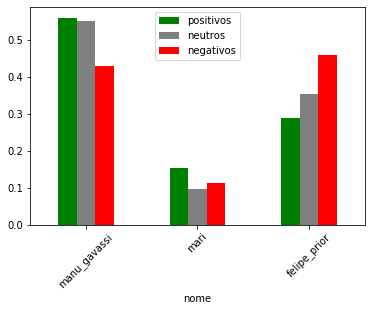

In [21]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Tweets por dia

In [22]:
names = list(candidates.keys())
tweets_by_day_df = get_tweets_by_day(candidates[names[0]], names[0])
for name in names[1:]:
    current = get_tweets_by_day(candidates[name], name)
    tweets_by_day_df = tweets_by_day_df.append(current)

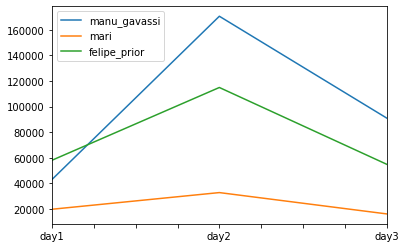

In [23]:
tweets_by_day_df.transpose().plot()

# Seleção de atributos

In [24]:
atributes_df = qtds_df_copy.join(pcts_df, rsuffix="_individual_pct")
atributes_df = atributes_df.join(qtds_df, rsuffix="_global_pct")
atributes_df = atributes_df.join(tweets_by_day_df)

In [25]:
raw_participantes_info = get_participantes_info()[DATE]
print("Seguidores atualizados em:", raw_participantes_info["date"])

Seguidores atualizados em: 10-04-2020


In [26]:
participantes_info = raw_participantes_info["infos"]
paredoes_info = get_paredoes_info()

In [27]:
followers = [participantes_info[participante]["seguidores"] for participante in atributes_df.index]


In [28]:
likes = [get_likes_count(candidates[participante]) for participante in atributes_df.index]

In [29]:
retweets = [get_retweets_count(candidates[participante]) for participante in atributes_df.index]

In [30]:
paredao_info = paredoes_info[PAREDAO]["candidatos"]
results_info = {candidate["nome"]: candidate["porcentagem"]/100 for candidate in paredao_info}
rejection = [results_info[participante] for participante in atributes_df.index]

In [31]:
atributes_df["likes"] = likes
atributes_df["retweets"] = retweets
atributes_df["seguidores"] = followers
atributes_df["rejeicao"] = rejection

In [32]:
atributes_df

,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
nome,,,,,,,,,,,,,,,,
manu_gavassi,71199,136446,96911,0.233780,0.448016,0.318204,0.559785,0.551039,0.428851,42943,170635,90978,6621309,989025,4785334,0.4251
mari,19342,23829,25292,0.282518,0.348057,0.369426,0.152072,0.096234,0.111922,19694,32725,16044,967975,131232,269733,0.0076
felipe_prior,36649,87341,103775,0.160907,0.383470,0.455623,0.288144,0.352728,0.459226,57998,114917,54850,6664432,1291988,642881,0.5673


In [33]:
atributes_df.to_csv("data/{}/paredao_atributes.csv".format(PAREDAO))